In [1]:
import mujoco
import mediapy

In [2]:
model = mujoco.MjModel.from_xml_path("../robot_models/pendulum/scene.xml")
data = mujoco.MjData(model)

# avoid rendeder to be black-screened
try:
    renderer
except:
    renderer = mujoco.Renderer(model)

""

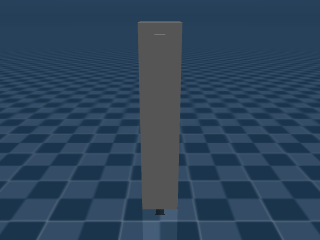

In [3]:
mujoco.mj_step(model, data)
renderer.update_scene(data)

mediapy.show_image(renderer.render())

In [4]:
import datetime

target_path = (
    f"../data/raw/pendulum/{datetime.datetime.now().strftime('%Y%m%d%H%M%S%f')}.csv"
)

In [5]:
from recorder import Recorder

duration = 10  # (seconds)
framerate = 30  # (Hz)

rec = Recorder(model)

from math import ceil

n_steps = int(ceil(duration * framerate)) + 1

# Simulate and display video.
frames = []
mujoco.mj_resetData(model, data)  # Reset state and time.
import numpy as np

while data.time < duration:
    data.ctrl = np.sin(data.time * 5) * data.time * 5
    mujoco.mj_step(model, data)

    # record data
    rec.record(data)

    if len(frames) < data.time * framerate:
        renderer.update_scene(data)
        pixels = renderer.render()
        frames.append(pixels)

rec.save_df(target_path)

mediapy.show_video(frames, fps=framerate)